In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/netflix1.csv")

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.tail()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [ ]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
#Show_id doesn't indicate anything so we can drop this column as a part of data cleaning
df.drop(columns=['show_id'],inplace =True)

In [ ]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df[df['release_year'] ==1925]

,type,title,director,country,date_added,release_year,rating,duration,listed_in
421,TV Show,Pioneers: First Women Filmmakers*,Not Given,Pakistan,12/30/2018,1925,TV-14,1 Season,TV Shows


In [ ]:
#Oldest TV show in the netflix dataset
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [ ]:
types_of_shows = df['type'].value_counts()
fig = px.bar(types_of_shows,color = types_of_shows.index,color_discrete_sequence=["#8a12f9", "#FFFFFF"],text_auto= True , template='plotly_dark')
fig.show()

In [ ]:
#Directory
df['director'].value_counts()

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [ ]:
directors = df['director'].tolist()
for i in directors:
    print(i)

Streaming output truncated to the last 5000 lines.
José Miguel Contreras
Ben Wallis
Elaine McMillion Sheldon
Michael Simon
Fernando Lebrija
Rodrigo Toro, Francisco Schultz
Susan Johnson
Lynn Shelton
Rajiv Mehra
Toshiyuki Kubooka
Toshiyuki Kubooka
Todd S. Yellin
Rajiv Mehra
Mohammed Hussain
Eli Craig
Shammi Kapoor
Umesh Mehra
Florian Schnell
Josh Izenberg, Wynn Padula
Thierry Demaizière, Alban Teurlai
Latif Faiziyev, Umesh Mehra
Gastón Duprat, Mariano Cohn
Gary Wang
Raz Degan
Israel Adrián Caetano
Mariano Cohn, Gastón Duprat
Marcus Raboy
Sarah Adina Smith
Cate Shortland
Adam Wingard
Marcus Raboy
Daniel Lindsay, T.J. Martin
Tommy Wirkola
Jay Chapman
Jay Chapman
Peter Hutchings
Jean-Claude La Marre
Jorge Hernandez Aldana
Michael Tiddes
Will Canon
Ernie Barbarash
S.S. Rajamouli
S.S. Rajamouli
Rob Silvestri
Matthias Hoene
Raúl Campos, Jan Suter
Bryan Fogel
Fabrice Du Welz
S.S. Rajamouli
Fernando González Molina
S.S. Rajamouli
S.S. Rajamouli
S.S. Rajamouli
Maz Jobrani
John Butler
Ali Scher
I

In [ ]:
all_dir = []
for i in directors:
    if "," in i:
        sub_director = i.split(",")
        for j in sub_director:
            all_dir.append(j.strip())
    else:
        all_dir.append(i)

In [ ]:
all_dir

['Kirsten Johnson',
 'Julien Leclercq',
 'Mike Flanagan',
 'Bruno Garotti',
 'Haile Gerima',
 'Andy Devonshire',
 'Theodore Melfi',
 'Suhas Kadav',
 'Christian Schwochow',
 'Suhas Kadav',
 'Suhas Kadav',
 'Suhas Kadav',
 'Not Given',
 'Krysia Plonka',
 'Kristian Mercado',
 'Krysia Plonka',
 'Kristian Mercado',
 'Krysia Plonka',
 'Kristian Mercado',
 'Krysia Plonka',
 'Kristian Mercado',
 'Not Given',
 'Not Given',
 'Mark Thornton',
 'Todd Kauffman',
 'Mark Thornton',
 'Todd Kauffman',
 'Mark Thornton',
 'Todd Kauffman',
 'Mark Thornton',
 'Todd Kauffman',
 'Robert Cullen',
 'José Luis Ucha',
 'Kongkiat Komesiri',
 'Pedro de Echave García',
 'Pablo Azorín Williams',
 'Anirban Majumder',
 'Olivier Megaton',
 'Alex Woo',
 'Stanley Moore',
 'S. Shankar',
 'Dennis Dugan',
 'Scott Stewart',
 'Robert Luketic',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'Not Given',
 'N

In [ ]:
s = pd.Series(data= all_dir)
s

0       Kirsten Johnson
1       Julien Leclercq
2         Mike Flanagan
3         Bruno Garotti
4          Haile Gerima
             ...       
9605          Not Given
9606          Not Given
9607          Not Given
9608          Not Given
9609          Not Given
Length: 9610, dtype: object

In [ ]:
s.value_counts()

Not Given              2588
Rajiv Chilaka            23
Jan Suter                21
Raúl Campos              19
Alastair Fothergill      19
                       ... 
Matt D'Avella             1
Parthiban                 1
Scott McAboy              1
Raymie Muzquiz            1
Mozez Singh               1
Length: 4992, dtype: int64

In [ ]:
len(s)

9610

In [ ]:
#country
df['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [ ]:
df['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

<Axes: xlabel='country', ylabel='count'>

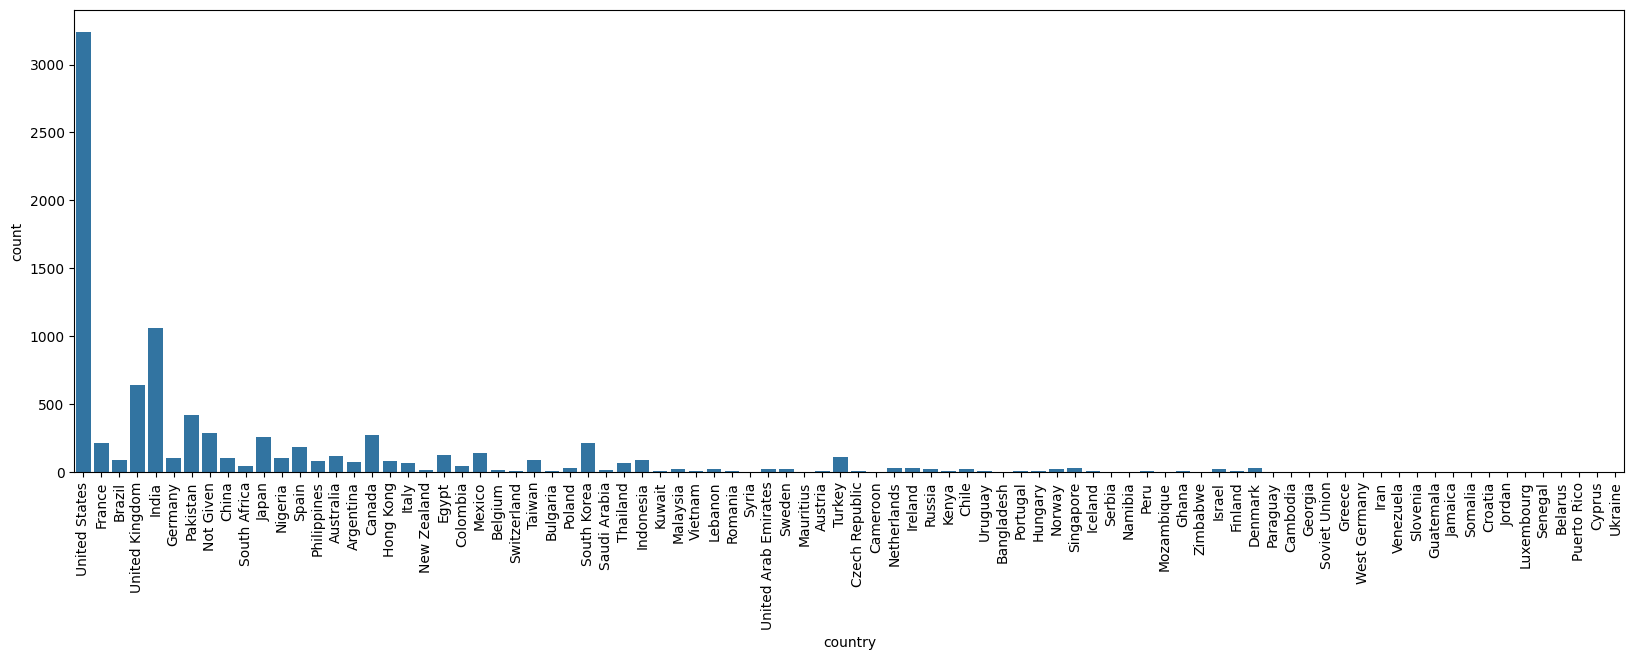

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.countplot(x='country',data=df)

In [ ]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

Of course the released movies and TV shows nowadays are very big in the old days as the technology and the population increased a lot

In [ ]:
fig = px.area(df['release_year'].value_counts(),template='plotly_dark')
fig.show()

In [ ]:
#Rating
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

<ipython-input-180-320d17711126>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




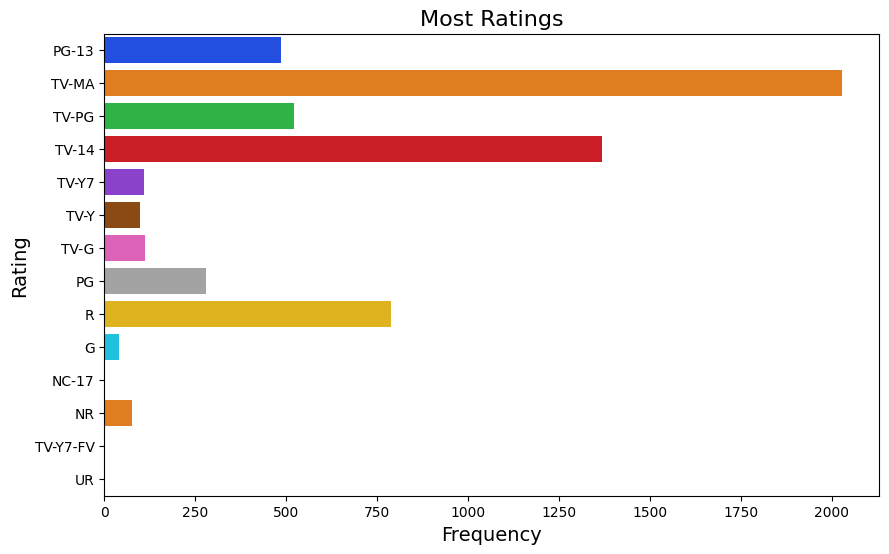

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, palette='bright')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Most Ratings', fontsize=16)
plt.show()

In [ ]:
fig = px.bar(data_frame= df['rating'].value_counts(),
             template='plotly_dark',
             x= df['rating'].value_counts(),
             y= df['rating'].value_counts().index,
             orientation='h',
             title = 'Most ratings',
             labels = {"x":"frequency"
                       }
            )
fig.show()

In [ ]:
df['duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [ ]:
# We change the Not Given value to Nan

In [ ]:
df.replace('Not Given', np.NaN , inplace= True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      6202 non-null   object
 3   country       8503 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [ ]:
#Drop missing values

In [ ]:
df.dropna(inplace= True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5915 entries, 0 to 6569
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5915 non-null   object
 1   title         5915 non-null   object
 2   director      5915 non-null   object
 3   country       5915 non-null   object
 4   date_added    5915 non-null   object
 5   release_year  5915 non-null   int64 
 6   rating        5915 non-null   object
 7   duration      5915 non-null   object
 8   listed_in     5915 non-null   object
dtypes: int64(1), object(8)
memory usage: 591.1+ KB


In [ ]:
#Top 5 directors

In [ ]:
fig = px.bar(data_frame=df['director'].value_counts()[0:5],
             x= df['director'].value_counts()[0:5],
             y= df['director'].value_counts()[0:5].index,
             color=df['director'].value_counts()[0:5].index,
             text_auto=True,
             orientation= "h",
             template = 'plotly_dark'
            )
fig.show()


<ipython-input-177-f23fdeb13998>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




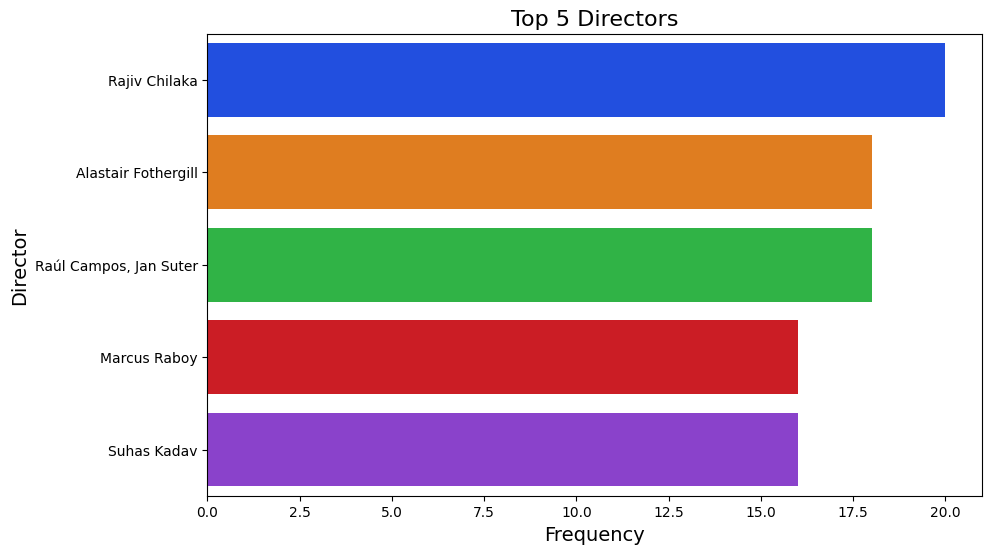

In [ ]:
top_directors = df['director'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='bright')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.title('Top 5 Directors', fontsize=16)
plt.show()